# Курс аналитик данных на Python
## Модуль 7.3 А/Б-тестирование с помощью Python. Непараметрические оценки.

In [1]:
import sys
sys.version

'3.9.1 (tags/v3.9.1:1e5d33e, Dec  7 2020, 17:08:21) [MSC v.1927 64 bit (AMD64)]'

In [2]:
import pandas as pd #https://pandas.pydata.org/
import numpy as np #https://www.numpy.org/
import scipy as sc #https://www.scipy.org/

import matplotlib.pyplot as plt #https://matplotlib.org/
import seaborn as sns #https://seaborn.pydata.org/
# import dash, jupyter_dash #https://plot.ly/

%matplotlib inline 

import warnings
warnings.simplefilter('ignore') #Здесь мы будем игнорировать предупреждения о грядущих изменениях вызовов sc.stats и прочего

**$H_0$** -- основная гипотеза, $\mathcal{F} = \mathcal{F_0}$  
**$H_1$** -- альтернативная гипотеза $\mathcal{F} \ne \mathcal{F_0}$

**_Критерий Колмогорова_**  
Важно: $\mathcal{F_0}$ должно быть непрерывным.

##### Задача
Собираемся открывать интернет-магазин, продавать компьютер какой-то модели Model. Мы рассматриваем цены на эту модель компьютеров в разных магазинах какой-то страны. Чтобы эффективно выйти на рынок, нам желательно поставить цену ниже некоторого "большинства", но не самую маленькую.
Собрали такие данные по 20 конкурентам: [90, 68, 51, 82, 62, 92, 85, 57, 68, 81, 70, 76, 78, 66, 80, 91, 97,
       88, 79, 76].

$H_0$: распределение имеет нормальный закон.  
$H_1$: распределение имеет какой-то другой закон.

In [3]:
X = np.array([90, 68, 51, 82, 62, 92, 85, 57, 68, 81, 70, 76, 78, 66, 80, 91, 97, 88, 79, 76])
n = X.shape[0]

# выборочное среднее
x_mean = np.mean(X)
# несмещённая выборочная дисперсия 
x_var_corr = ((x_mean - X)**2/(n-1)).sum()
# выборочное несмещённое среднеквадратическое отклонение
x_std_corr = np.sqrt(x_var_corr)
print('Параметры распределения a: {a:.2f}, var: {v:.2f}, sigma: {s:.2f}'.format(a=x_mean, v=x_var_corr, s=x_std_corr))

Параметры распределения a: 76.85, var: 150.77, sigma: 12.28


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


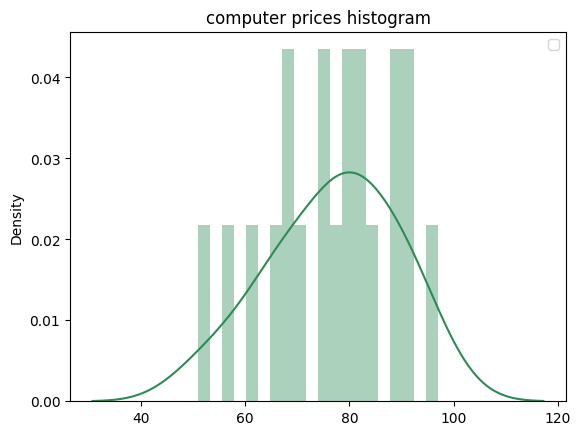

In [4]:
sns.distplot(X, color='seagreen', bins=20)
plt.title('computer prices histogram')
plt.legend()
plt.show()

In [5]:
sc.stats.kstest(X, cdf='norm', args=(x_mean, x_std_corr))

KstestResult(statistic=0.12240497269408301, pvalue=0.8904208418127803, statistic_location=76, statistic_sign=-1)

In [6]:
sc.stats.kstest(X, cdf='uniform', args=(X.min(), X.max()-X.min()))

KstestResult(statistic=0.1934782608695652, pvalue=0.3920802516420857, statistic_location=76, statistic_sign=-1)

In [7]:
X = np.random.normal(180, 2, 100)
n = X.shape[0]

# выборочное среднее
x_mean = np.mean(X)
# несмещённая выборочная дисперсия 
x_var_corr = ((x_mean - X)**2/(n-1)).sum()
# выборочное несмещённое среднеквадратическое отклонение
x_std_corr = np.sqrt(x_var_corr)
print('Параметры распределения a: {a:.2f}, var: {v:.2f}, sigma: {s:.2f}'.format(a=x_mean, v=x_var_corr, s=x_std_corr))

Параметры распределения a: 179.90, var: 3.24, sigma: 1.80


In [8]:
sc.stats.kstest(X, cdf='norm', args=(x_mean, x_std_corr))

KstestResult(statistic=0.052594510585132315, pvalue=0.9311568589778731, statistic_location=181.46758321389, statistic_sign=1)

In [9]:
X = np.random.uniform(50, 100, 100)

In [10]:
sc.stats.kstest(X, cdf='uniform', args=(50, 50))

KstestResult(statistic=0.12753700721349415, pvalue=0.07065427807108582, statistic_location=82.12314963932529, statistic_sign=1)

**_Критерий Колмогорова-Смирнова_**  
Важно: $\mathcal{F_0}$ и $\mathcal{G_0}$  должны быть непрерывными.

**$H_0$** -- основная гипотеза, $\mathcal{F} = \mathcal{G}$  
**$H_1$** -- альтернативная гипотеза $\mathcal{F} \ne \mathcal{G}$

##### Задача  
Все приходящие пользователи на сайт-игру случайным образом разделялись на две группы. Первой группе показывали старую версию, второй группе новую. Для каждого пользователя мы измерили количество проведённого времени в игре в минутах.  
Оно оказалось таким:

In [11]:
X0 = np.random.normal(30, 21, 100)
Y0 = np.random.normal(35, 23, 100)

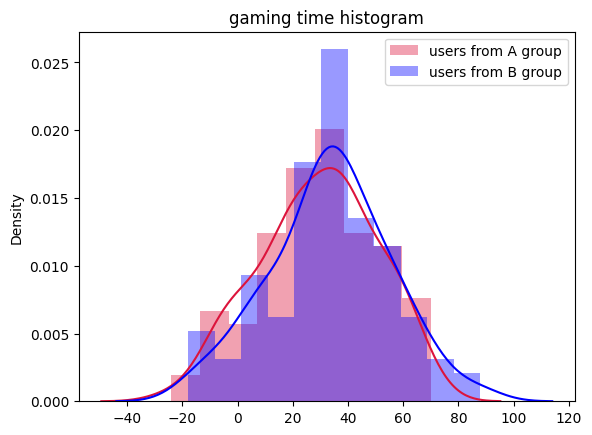

In [12]:
sns.distplot(X0, color='crimson', label='users from A group')
sns.distplot(Y0, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [13]:
sc.stats.ks_2samp(X0, Y0)

KstestResult(statistic=0.16, pvalue=0.1548386665118475, statistic_location=22.59064074013994, statistic_sign=1)

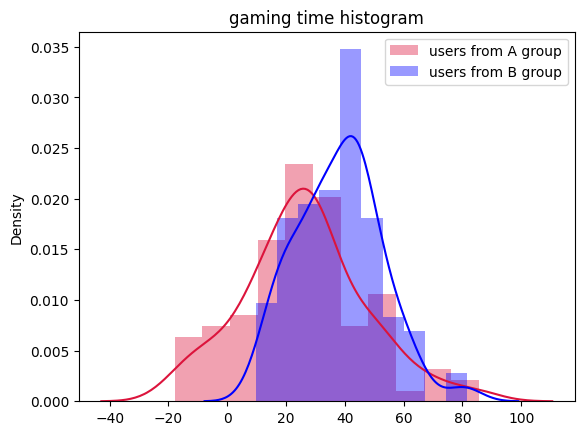

KstestResult(statistic=0.35, pvalue=7.850159128072286e-06, statistic_location=29.89190445632352, statistic_sign=1)

In [14]:
X1 = np.random.normal(30, 21, 100)
Y1 = np.random.normal(35, 15, 100)
sns.distplot(X1, color='crimson', label='users from A group')
sns.distplot(Y1, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()
sc.stats.ks_2samp(X1, Y1)

**_Критерий Манна-Уитни_**  
Важно: $\mathcal{F_0}$ и $\mathcal{G_0}$  должны быть непрерывными.  
Этот критерий "не любит" много совпадающих значений, может применяться для малых выборок.

In [15]:
sc.stats.mannwhitneyu(X0, Y0)

MannwhitneyuResult(statistic=4491.0, pvalue=0.21406569190437452)

In [16]:
sc.stats.mannwhitneyu(X1, Y1)

MannwhitneyuResult(statistic=3097.0, pvalue=3.3428087741811323e-06)

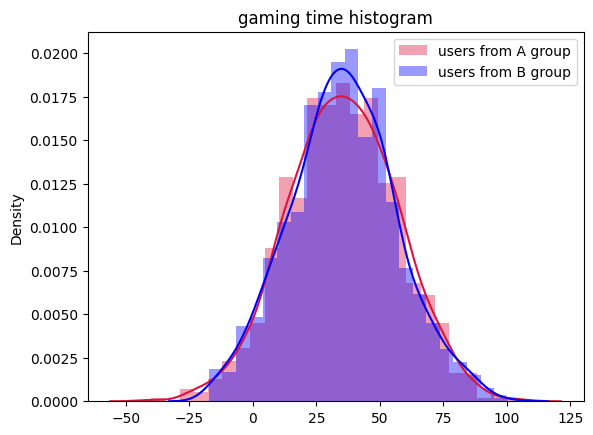

In [17]:
X2 = np.random.normal(35, 21, 1000)
Y2 = np.random.normal(35, 21, 1000)
sns.distplot(X2, color='crimson', label='users from A group')
sns.distplot(Y2, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [18]:
sc.stats.ks_2samp(X2, Y2)

KstestResult(statistic=0.033, pvalue=0.647814872077161, statistic_location=54.08413076201542, statistic_sign=-1)

In [19]:
sc.stats.mannwhitneyu(X2, Y2)

MannwhitneyuResult(statistic=500627.0, pvalue=0.961304731377171)

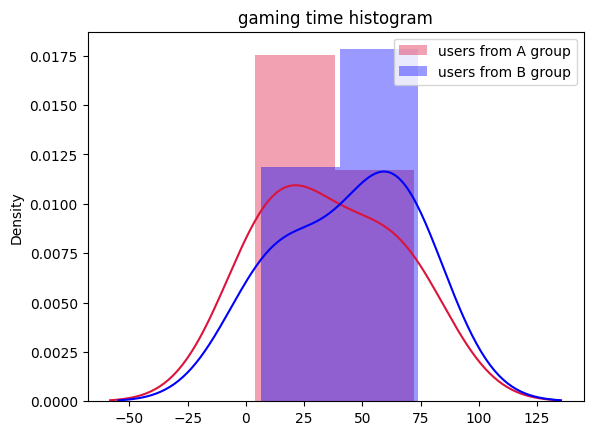

In [20]:
X2 = np.random.normal(35, 21, 5)
Y2 = np.random.normal(35, 21, 5)
sns.distplot(X2, color='crimson', label='users from A group')
sns.distplot(Y2, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [21]:
sc.stats.ks_2samp(X2, Y2)

KstestResult(statistic=0.2, pvalue=1.0, statistic_location=56.65286940492483, statistic_sign=1)

In [22]:
sc.stats.mannwhitneyu(X2, Y2)

MannwhitneyuResult(statistic=10.0, pvalue=0.6904761904761905)

**Домашнее задание.**  
Попробовать сформулировать задачу A/B-тестирования функциональности сайта / эффективности магазина / измерений какого-нибудь физического эксперимента.  
Эта задача должна включать в себя:  
1. Постановку разделения выборки (случайно, равновероятно),  
2. Сбор данных (ну или искусственную генерацию),  
3. Проверку гипотез с выбором уровня значимости (критической области) заранее.